In [1]:
import os
if "FRIGUS_DATADIR_ROOT" not in os.environ:
    os.environ["FRIGUS_DATADIR_ROOT"] = f"{os.environ['CONDA_PREFIX']}/data"

from pathlib import Path
from matplotlib import pyplot as plt
import LWphotorates as lwpr

from lwrates_analysis.plotting_helpers import save_plot_to_path

plt.style.use(Path(os.environ["HOME"]) / "default.mplstyle")

PLOT_DIR = Path("/cephfs/andrea/plots")

In [2]:
map_label_to_reference = {
    "OO_60": "Ohmura & Ohmura (1960)",
#     "W_79": "Wishart (1979)",
    "J_88": "John (1988)",
    "C_07": "Chuzhoy et al. (2007)",
    "ML_17": "McLaughlin et al. (2017)",
}

cross_section_dict = {}
for label in map_label_to_reference.keys():
    cross_section_dict[label] = lwpr.HM.get_cross_section(label)

The path provided already corresponds to a file, it will be overwritten.


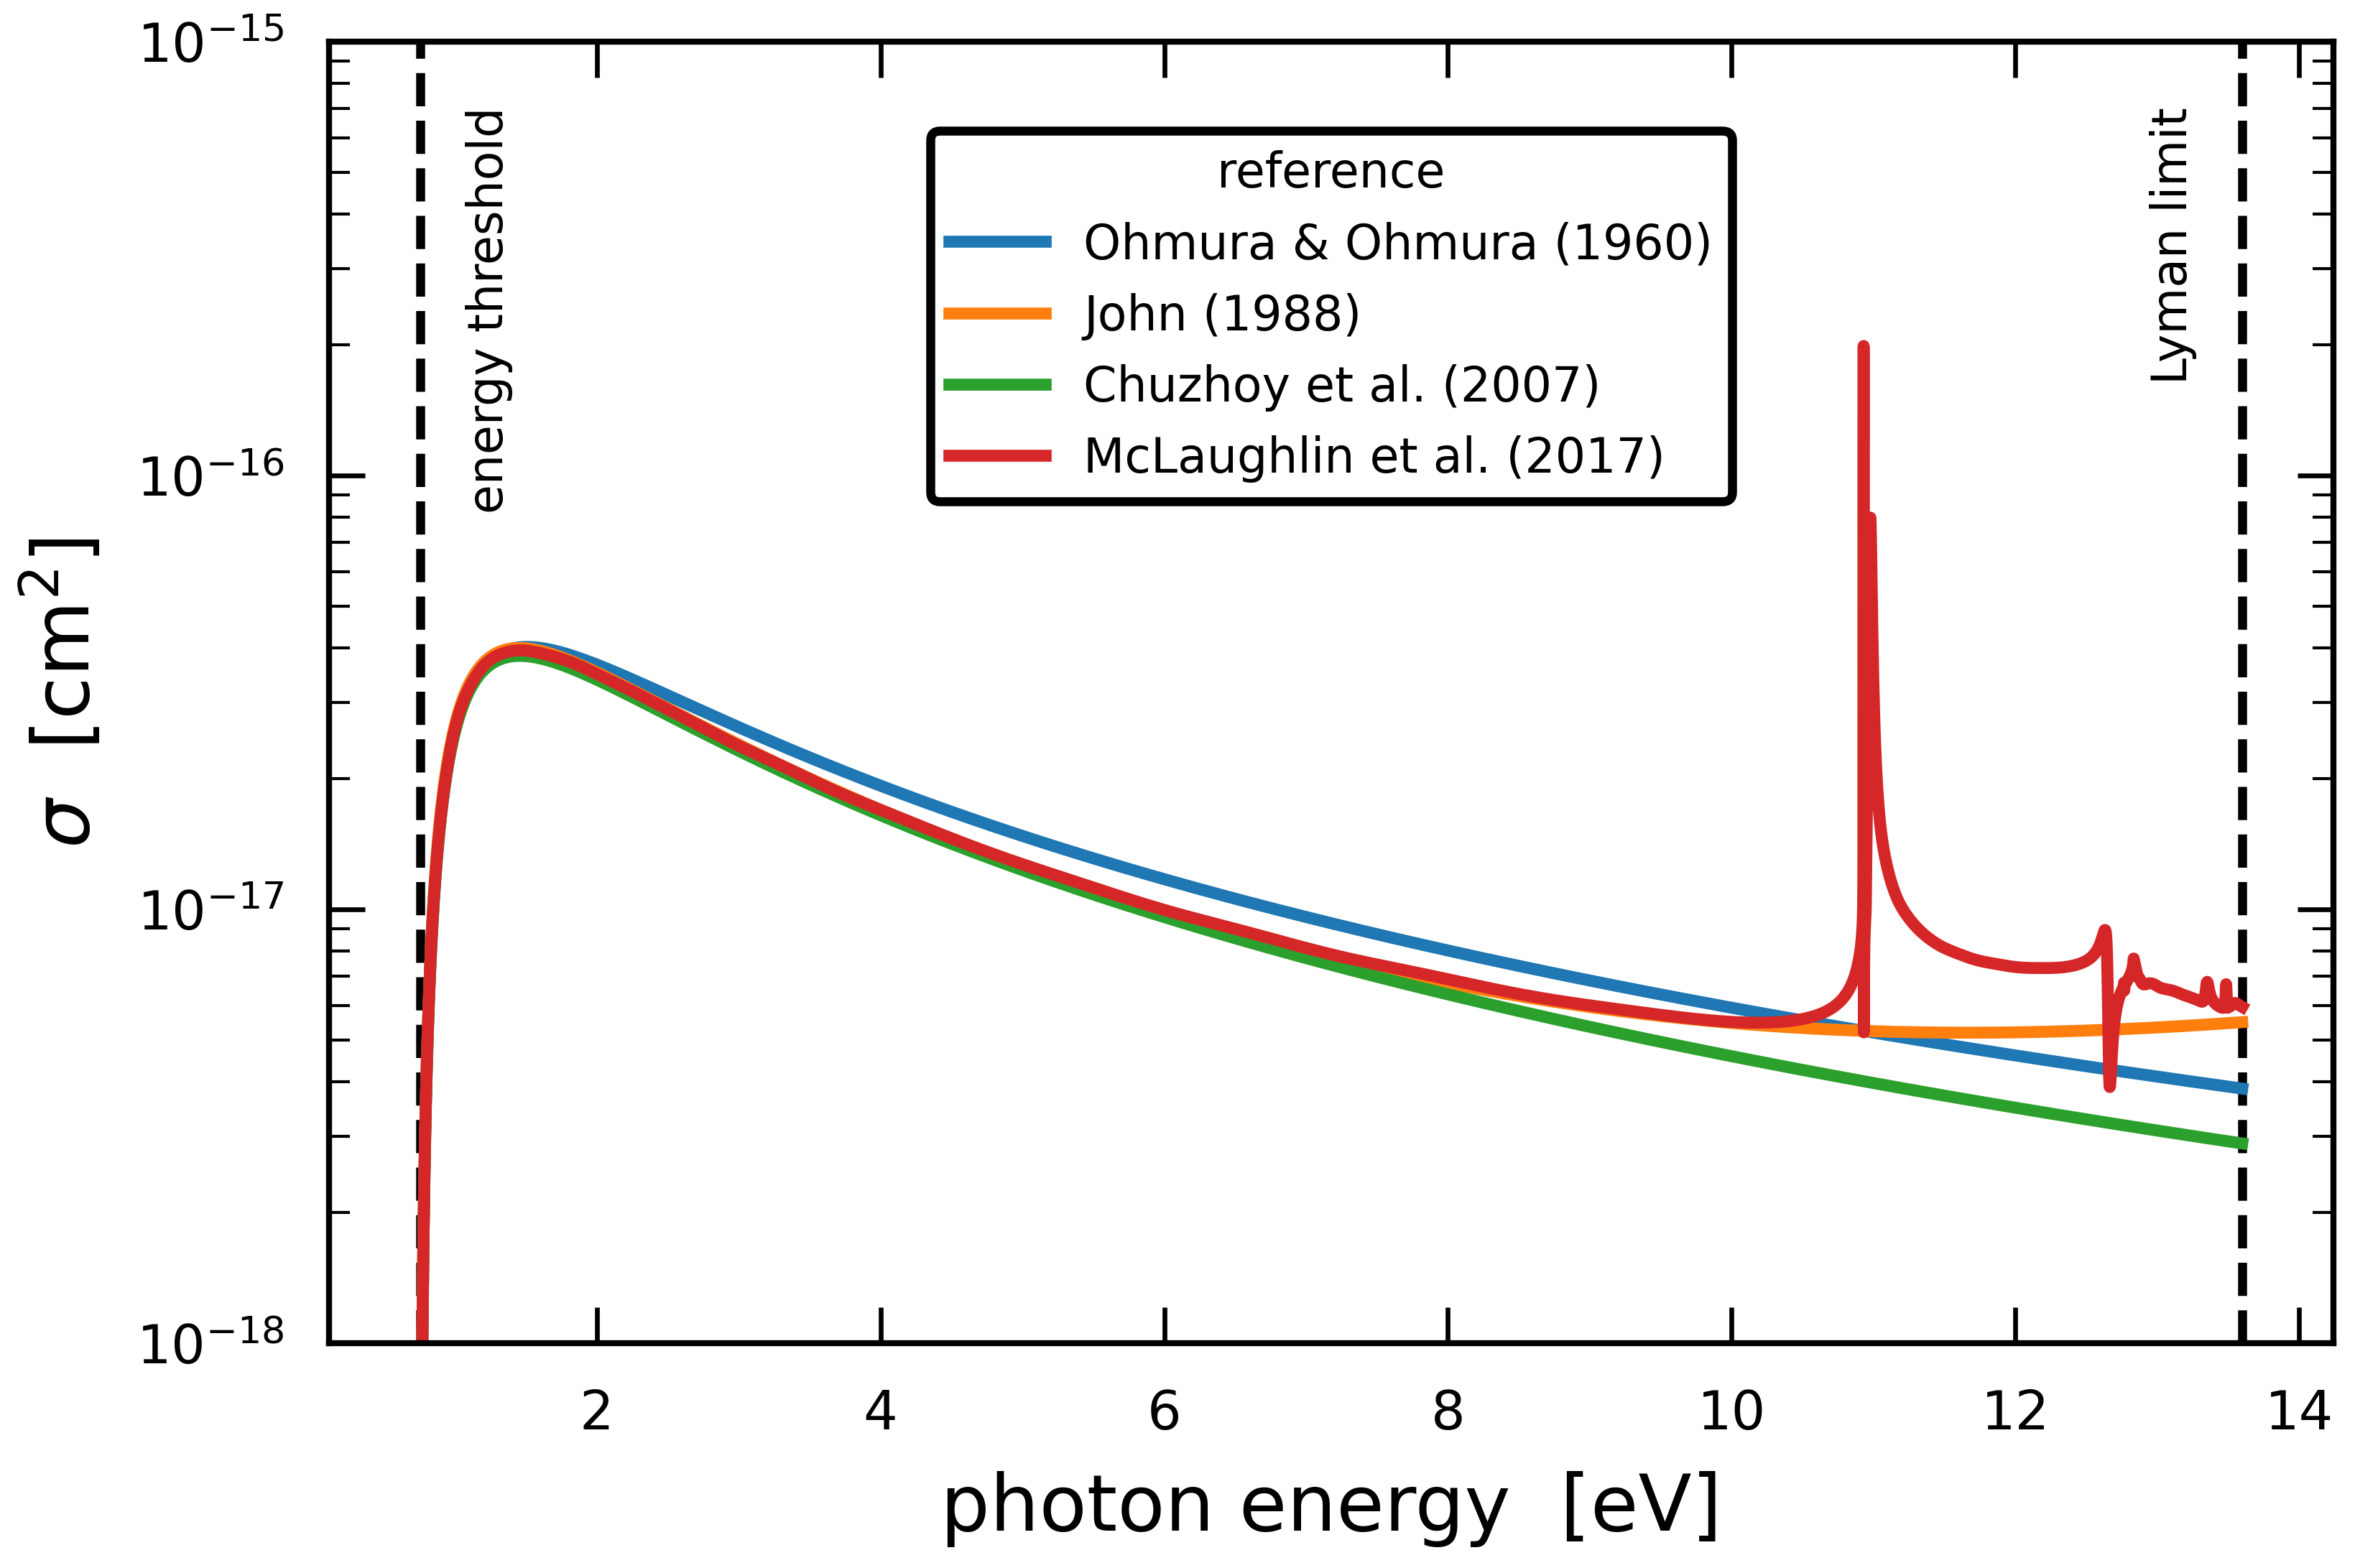

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

for label, reference in map_label_to_reference.items():
    ax.plot(
        cross_section_dict[label]["energy"],
        cross_section_dict[label]["cross_section"],
        label=reference, lw=4)
ax.set_yscale("log")
ax.set_ylabel(r"$\sigma$  [cm$^2$]")
ax.set_xlabel("photon energy  [eV]")
ax.set_ylim(bottom=1e-18, top=1e-15)

vline_kwargs = dict(lw=3, ls="--", c="k", zorder=0)
ax.axvline(lwpr.HM.get_reaction_min_energy().value, **vline_kwargs)
ax.axvline(lwpr.HM.get_ioniz_energy_hydrogen().value, **vline_kwargs)
leg = ax.legend(
    title="reference", fontsize="medium",
    loc="upper center", bbox_to_anchor=(0.5, 0.95))
leg.get_frame().set_linewidth(3)
text_kwargs = dict(
    ha="center", va="top", fontsize=16, color="k",
    rotation=90, transform=ax.transAxes)
ax.text(0.92, 0.95, "Lyman limit", **text_kwargs)
ax.text(0.08, 0.95, "energy threshold", **text_kwargs)

save_plot_to_path(fig, PLOT_DIR / "development" / "HM" / "cross_section_comparison.png")